<a href="https://colab.research.google.com/github/Harshkotkar/Deep-Learning/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout


In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train=x_train/255.0
x_test=x_test/255.0


In [4]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)


In [5]:
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [6]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation="relu"),
    Dense(10,activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
history=model.fit(x_train,y_train_cat,
                  epochs=10,
                  validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7436 - loss: 0.6865 - val_accuracy: 0.8739 - val_loss: 0.3463
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8757 - loss: 0.3381 - val_accuracy: 0.8927 - val_loss: 0.2990
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8982 - loss: 0.2769 - val_accuracy: 0.9000 - val_loss: 0.2702
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9091 - loss: 0.2494 - val_accuracy: 0.8963 - val_loss: 0.2723
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9183 - loss: 0.2195 - val_accuracy: 0.9049 - val_loss: 0.2664
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9256 - loss: 0.1969 - val_accuracy: 0.9097 - val_loss: 0.2538
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9291 - loss: 0.1851 - val_accuracy: 0.9082 - val_loss: 0.2532
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9346 - loss: 0.1732 -

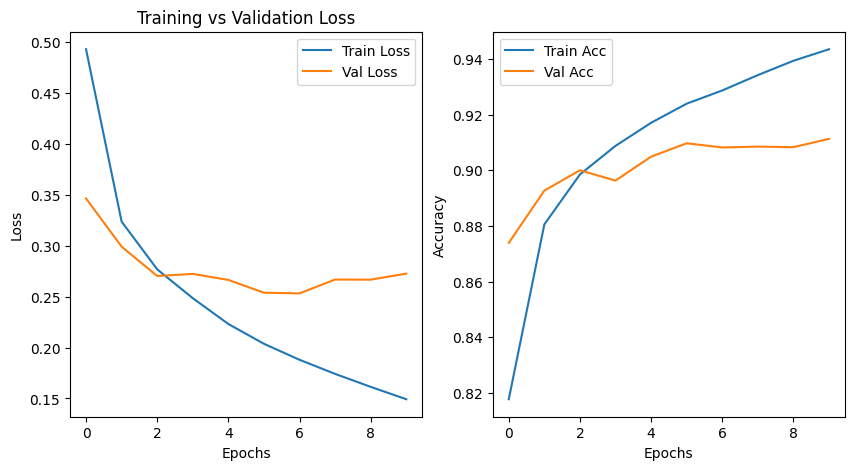

In [12]:
fig,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].plot(history.history['loss'],label='Train Loss')
axis[0].plot(history.history['val_loss'],label='Val Loss')
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Loss')
axis[0].legend()
axis[0].set_title('Training vs Validation Loss')
axis[1].plot(history.history['accuracy'],label='Train Acc')
axis[1].plot(history.history['val_accuracy'],label='Val Acc')
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Accuracy')
axis[1].legend()

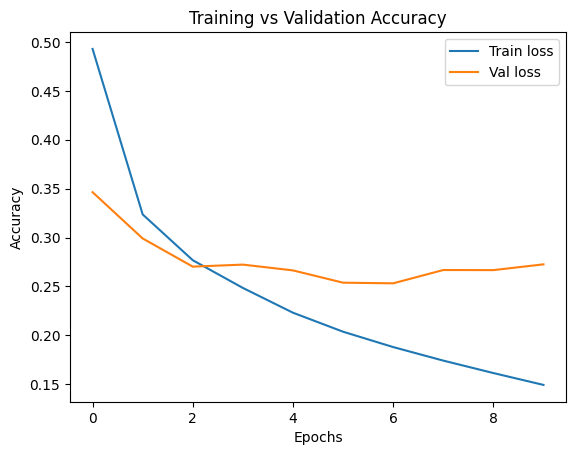

In [11]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


